In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator
from logic import *
import numpy as np
from itertools import product

# Circuitry

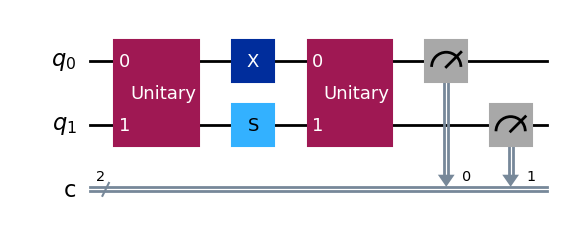

In [2]:
circ = QuantumCircuit(2,2)

I_2 = np.identity(4)

X_2 = np.matrix([[0,0,0,1], 
                 [0,0,1,0],
                 [0,1,0,0],
                 [1,0,0,0]])
J_2 = Operator(1 / np.sqrt(2) * (I_2 + 1j *X_2))    

circ.append(J_2, [0,1])
circ.x(0) # assigns the X gate to player 1
circ.s(1) # assigns the S gate to player 2
circ.append(J_2, [0,1])
circ.measure([0,1], [0,1])

circ.draw(output='mpl')

# Examples

### # (1) Classical basis of Prisoner's Dilemma

In [3]:
prisoner_game = Game(game_name='prisoner', num_players=2, protocol="Classical")
prisoner_game.display_payoffs()

Game: prisoner
Payoffs: 


,outcome,payoffs
0,00,"(-1, -1)"
1,01,"(-3, 0)"
2,10,"(0, -3)"
3,11,"(-2, -2)"


In [4]:
P1_strategy = 1
P2_strategy = 1
combined_strategies = [P1_strategy, P2_strategy]
outcomes, results = prisoner_game.play_game(combined_strategies, n_times=1)
prisoner_game.show_results()

,Outcome,Payoffs,Winners,num_times
0,11,"[-2, -2]",No winners,1


### (2) EWL Quantization of Prisoner's Dilemma (Simulation)

In [5]:
prisoner_game_quantum = Game(game_name='prisoner', num_players=2, protocol="EWL")
prisoner_game_quantum.display_payoffs()

Game: prisoner
Payoffs: 


,outcome,payoffs
0,00,"(-1, -1)"
1,01,"(-3, 0)"
2,10,"(0, -3)"
3,11,"(-2, -2)"


Transpiling circuit ....
Executing transpiled circuit ....
Circuit running ...
Circuit finished running, getting counts ...


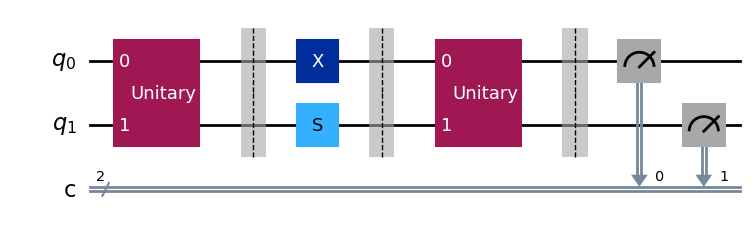

In [6]:
P1_strategy = 'X'
P2_strategy = 'S'
combined_strategies = [P1_strategy, P2_strategy]
outcomes, results = prisoner_game_quantum.play_game(combined_strategies, n_times=1)
prisoner_game_quantum._quantum_game.circ.draw(output='mpl')

In [7]:
prisoner_game_quantum.show_results()

,Outcome,Payoffs,Winners,num_times
0,01,"[-3, 0]",Player 2,1


In [8]:
outcomes_sim, results_sim = prisoner_game_quantum.play_game(combined_strategies, n_times = 100)
prisoner_game_quantum.show_results()

Transpiling circuit ....
Executing transpiled circuit ....
Circuit running ...
Circuit finished running, getting counts ...


,Outcome,Payoffs,Winners,num_times
0,01,"[-3, 0]",Player 2,52
1,10,"[0, -3]",Player 1,48


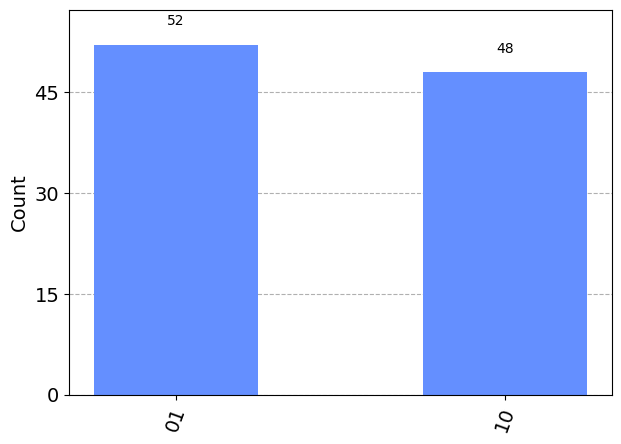

In [9]:
plot_histogram(outcomes_sim)

### (3) EWL Quantization of Prisoner's Dilemma (IBM Cloud)

In [10]:
prisoner_game_quantum = Game(game_name='prisoner', num_players = 2, protocol="EWL", group='open', backend="real_machine")
P1_strategy = 'X'
P2_strategy = 'S'
combined_strategies = [P1_strategy, P2_strategy]
outcomes_q, results_q = prisoner_game_quantum.play_game(combined_strategies, n_times = 100)
prisoner_game_quantum.show_results()

Transpiling circuit ....
Executing transpiled circuit ....
Circuit running ...
Circuit finished running, getting counts ...


,Outcome,Payoffs,Winners,num_times
0,11,"[-2, -2]",No winners,7
1,10,"[0, -3]",Player 1,37
2,00,"[-1, -1]",No winners,15
3,01,"[-3, 0]",Player 2,41


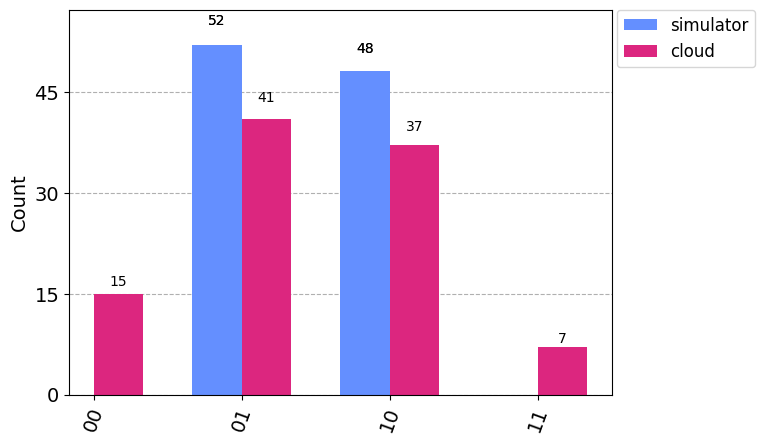

In [11]:
plot_histogram([outcomes_sim,outcomes_q], legend=['simulator', 'cloud'])

# EWL Quantization Protocol Towards Nash Equilibrium (IBM Cloud)

In [12]:
strategies = ['X', 'S']  # Defect or Cooperate

best_outcome = float('-inf')
best_strategies = None

for P1_strategy, P2_strategy in product(strategies, repeat=2):
    prisoner_game_quantum = Game(game_name='prisoner', num_players=2, protocol="EWL", backend="real_machine")
    combined_strategies = [P1_strategy, P2_strategy]
    outcomes_q, results_q = prisoner_game_quantum.play_game(combined_strategies, n_times=100)
    total_payoff = sum(outcomes_q.values())
    if total_payoff > best_outcome:
        best_outcome = total_payoff
        best_strategies = (P1_strategy, P2_strategy)

print("Best Outcome:", best_outcome)
print("Best Strategies for Player 1 and Player 2:", best_strategies)

Transpiling circuit ....
Executing transpiled circuit ....
Circuit running ...
Circuit finished running, getting counts ...
Transpiling circuit ....
Executing transpiled circuit ....
Circuit running ...
Circuit finished running, getting counts ...
Transpiling circuit ....
Executing transpiled circuit ....
Circuit running ...
Circuit finished running, getting counts ...
Transpiling circuit ....
Executing transpiled circuit ....
Circuit running ...
Circuit finished running, getting counts ...
Best Outcome: 100
Best Strategies for Player 1 and Player 2: ('X', 'X')


In [ ]:
custom_payoff = {
    ('A', 'A', 'A'): (5, 5, 5),
    ('A', 'A', 'B'): (0, 8, 8),
    ('A', 'B', 'A'): (8, 0, 8),
    ('A', 'B', 'B'): (0, 0, 10),
    ('B', 'A', 'A'): (8, 8, 0),
    ('B', 'A', 'B'): (10, 0, 0),
    ('B', 'B', 'A'): (0, 10, 0),
    ('B', 'B', 'B'): (1, 1, 1)
}

three_player_game = Game(game_name='custom_game', protocol='EWL', num_players=3, payoff_table=custom_payoff, backend='real_machine')

strategies = ['X', 'S'] 

best_outcome = float('-inf')
best_strategies = None

for P1_strategy, P2_strategy, P3_strategy in product(strategies, repeat=3):
    combined_strategies = [P1_strategy, P2_strategy, P3_strategy]
    outcomes_q, results_q = three_player_game.play_game(combined_strategies, n_times=100)
    total_payoff = sum(outcomes_q.values())
    if total_payoff > best_outcome:
        best_outcome = total_payoff
        best_strategies = (P1_strategy, P2_strategy, P3_strategy)

print("Best Outcome:", best_outcome)
print("Best Strategies for Player 1, 2, and 3:", best_strategies)